Rename your notebooks in this format: <b>StudentNumber_EDA</b>

For example: <b>2018160307_EDA</b>

Set your kernel to private prior to the deadline (to avoid other students copying).

Set it to public after the deadline (to allow us to check your codes).

This kernel is divided into tasks by headers. Each cell is commented with the specific required task.
Copy and edit this kernel. Do not delete pre-writen comments. Just insert your code.
As much as possible, write comments in your code.

In [1]:
# Import libraries and packages
import numpy as np # for array manipulations
import pandas as pd # for reading data/dataframes
import os # for directory
from matplotlib import pyplot as plt # for visualization
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

# Use seaborn style to make visualization prettier
plt.style.use('seaborn')

In [2]:
# Get paths of datasets to be used for EDA
eda_root = './corona_dataset'
eda_paths = sorted([os.path.join(eda_root, x) for x in os.listdir(eda_root)])
for path in eda_paths:
    print(path)

./corona_dataset\Case.csv
./corona_dataset\PatientInfo.csv
./corona_dataset\Policy.csv
./corona_dataset\Region.csv
./corona_dataset\SearchTrend.csv
./corona_dataset\SeoulFloating.csv
./corona_dataset\Time.csv
./corona_dataset\TimeAge.csv
./corona_dataset\TimeGender.csv
./corona_dataset\TimeProvince.csv
./corona_dataset\Weather.csv


### Task 1: Age

In [3]:
age_csv = pd.read_csv(eda_paths[7]) # read the data

# show first few rows
#age_csv.head()
age_csv.describe()

,time,confirmed,deceased
count,1089.0,1089.000000,1089.000000
mean,0.0,1158.129477,23.419651
std,0.0,822.619497,37.387911
min,0.0,32.000000,0.000000
25%,0.0,530.000000,0.000000
50%,0.0,1052.000000,3.000000
75%,0.0,1537.000000,35.000000
max,0.0,3362.000000,139.000000


In [4]:
# show the basic statistics for the confirmed and deceased cases
age_csv.describe().drop(columns=['time'])[1:] # remove time and don't show count
#age_csv.describe().drop(['time'], axis=1).iloc[1:]
#age_csv.describe().drop(['time'], axis=1).iloc[1:]

,confirmed,deceased
mean,1158.129477,23.419651
std,822.619497,37.387911
min,32.000000,0.000000
25%,530.000000,0.000000
50%,1052.000000,3.000000
75%,1537.000000,35.000000
max,3362.000000,139.000000


In [5]:
# It's optional to print the answers to the questions, but for the sake of demonstration:
# Q1
# check for missing values
# isnull() returns a boolean value in each cell indicating whether there is a missing or NaN value
# one way to check if the dataframe has any missing value at all, we can use numpy's unique function
A1 = 0 if True not in np.unique(age_csv.isnull().values) else 1
print('Answer to Q1:', A1)
# the result means that there are no missing values since only False is the unique value in all cells

#                 Q2
# there can be many ways of arriving to the answer
# just showing two
print('Answer to Q2:', len(age_csv))
print('Answer to Q2:', age_csv.shape[0])

#                 Q3
# again, there can be many ways of arriving to the answer
# just showing two
print('Answer to Q3:', len(age_csv.columns))
print('Answer to Q3:', age_csv.shape[1])

#                 Q4
# checking for the number of unique values in a column
print('Answer to Q4:', age_csv['age'].nunique())

# convert date column from string to datetime
age_csv['date'] = pd.to_datetime(age_csv['date']) # already in a good format

# get the start date
start_date = age_csv['date'].min()
# get the end date
end_date = age_csv['date'].max()
# get the total number of days from start to end
print('Answer to Q5:', end_date-start_date)

Answer to Q1: 0
Answer to Q2: 1089
Answer to Q2: 1089
Answer to Q3: 5
Answer to Q3: 5
Answer to Q4: 9
Answer to Q5: 120 days 00:00:00


C:\Users\Kimtaeyoon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


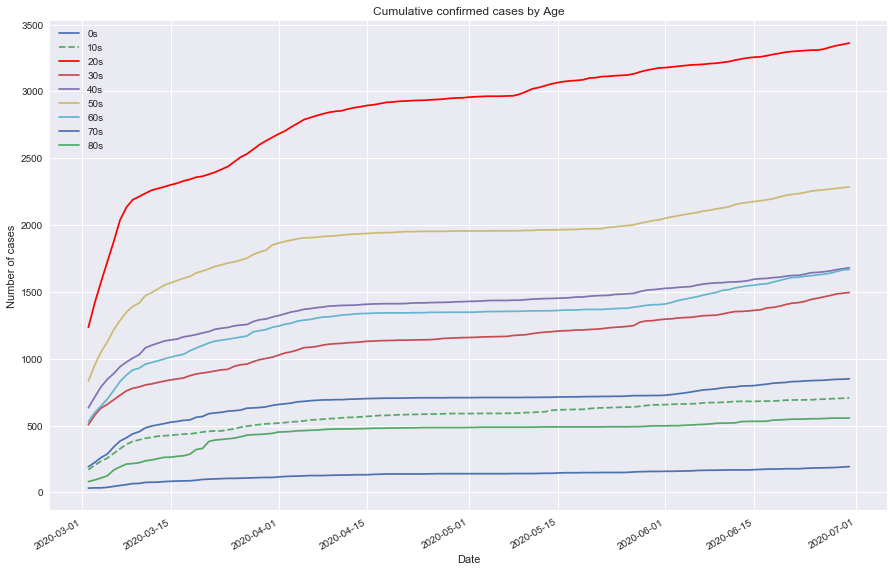

In [6]:
fig = plt.figure(figsize=(15,10)) # set the image size
# set the title
plt.title('Cumulative confirmed cases by Age')
# plot for each age group
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '0s'], label='0s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '10s'], label='10s', linestyle='--') # change line style
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '20s'], label='20s', color='red') # change color
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '30s'], label='30s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '40s'], label='40s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '50s'], label='50s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '60s'], label='60s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '70s'], label='70s')
plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == '80s'], label='80s')
# show the legend
plt.legend()
# add axis labels
plt.xlabel('Date')
plt.ylabel('Number of cases')
# rotate the dates for better visibility
plt.gcf().autofmt_xdate()
# show the plot
plt.show()

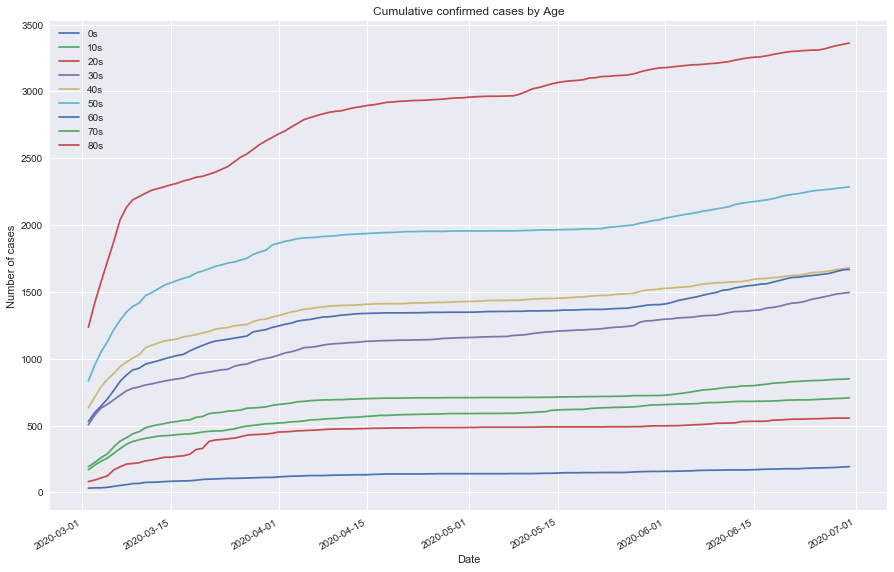

In [7]:
# here is another way you can plot

fig = plt.figure(figsize=(15,10)) # set the image size
# set the title
plt.title('Cumulative confirmed cases by Age')

# loop over the age groups
for x in age_csv.age.unique():
    plt.plot('date', 'confirmed', data=age_csv[age_csv['age'] == x], label=x)

# show the legend
plt.legend()
# add axis labels
plt.xlabel('Date')
plt.ylabel('Number of cases')
# rotate the dates for better visibility
plt.gcf().autofmt_xdate()
# show the plot
plt.show()

# you can also make your own plotting funciton

In [10]:
# answers to Q6 and Q7 can be eye-balled from the plot
print('Answer to Q6:', 2)
print('Answer to Q7:', 1500)

Answer to Q6: 2
Answer to Q7: 1500


In [11]:
total_deceased = [] # get the total number of deceased
age_groups = age_csv.age.unique() # get the unique values under the age column
for x in age_groups:
    total_deceased.append(age_csv[age_csv['age']==x]['deceased'].max())

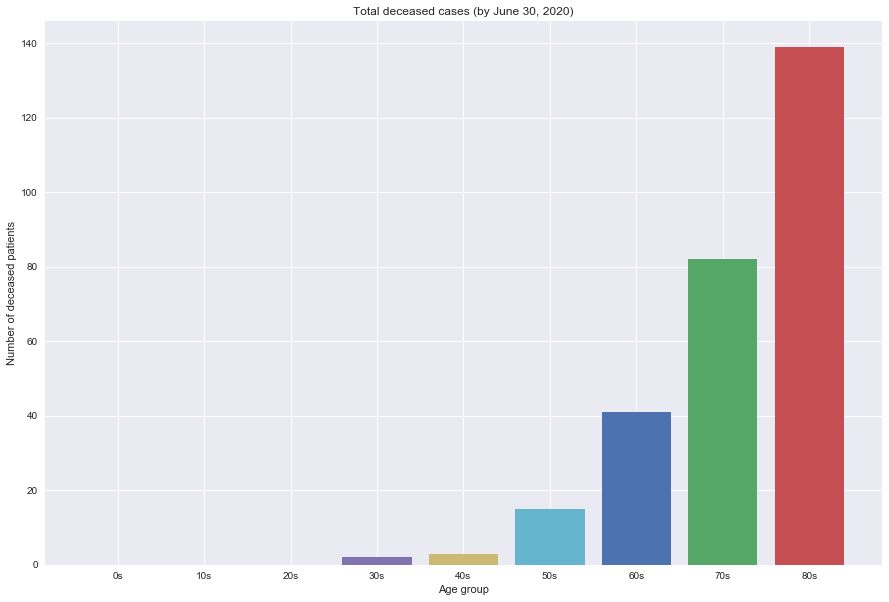

In [12]:
# plot a bar graph for the deceased cases
fig = plt.figure(figsize=(15,10))
plt.bar(age_groups, total_deceased, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])
plt.title('Total deceased cases (by June 30, 2020)')
plt.xlabel('Age group')
plt.ylabel('Number of deceased patients')
plt.show()

In [13]:
                                                #Q8

In [14]:
index = age_csv['deceased'].argmax()
print("Answer to Q8 : ",age_csv.iloc[index]['age'])

Answer to Q8 :  80s


C:\Users\Kimtaeyoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [15]:
                                                #Q9

In [16]:
print("Answer to Q9 : ", age_csv[age_csv['age']=='70s'].iloc[-1]['deceased'])

Answer to Q9 :  82


You can use matplotlib to create different kinds of plots. See [this page](https://matplotlib.org/tutorials/introductory/sample_plots.html) for more details.

### Task 2: Region

In [17]:
# load/read the data
# create appropriate plots

In [18]:
for path in eda_paths:
    print(path)

./corona_dataset\Case.csv
./corona_dataset\PatientInfo.csv
./corona_dataset\Policy.csv
./corona_dataset\Region.csv
./corona_dataset\SearchTrend.csv
./corona_dataset\SeoulFloating.csv
./corona_dataset\Time.csv
./corona_dataset\TimeAge.csv
./corona_dataset\TimeGender.csv
./corona_dataset\TimeProvince.csv
./corona_dataset\Weather.csv


In [19]:
region_csv = pd.read_csv(eda_paths[9]) # read the data
region_csv

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


In [20]:
                                                #10

In [21]:
confirmed_largest = region_csv['confirmed'].max()
#print("Answer to Q8 : ", region_csv.iloc[index]['age'])
print("Answer to Q10 : ", confirmed_largest)

Answer to Q10 :  6906


In [22]:
                                                #11

In [23]:
released_average = region_csv['released'].mean()
print("Answer to Q11 : ", round(released_average))

Answer to Q11 :  321


In [24]:
                                                #12

In [29]:
provinces_lot = region_csv['province'].nunique()
print("Answer to Q12 : ", provinces_lot)

Answer to Q12 :  17


In [30]:
                                                #13

In [32]:
provinces_1 = region_csv[region_csv['date']=='2020-06-30'].drop(columns=['time','date','released','deceased'])
provinces_2 = provinces_1.sort_values(by = 'confirmed',ascending = False)
provinces_2

,province,confirmed
2756,Daegu,6906
2768,Gyeongsangbuk-do,1389
2754,Seoul,1312
2762,Gyeonggi-do,1207
2757,Incheon,341
2765,Chungcheongnam-do,167
2755,Busan,154
2769,Gyeongsangnam-do,134
2759,Daejeon,117
2763,Gangwon-do,65


In [33]:
print("Answers to Q13 : ", "3")

Answers to Q13 :  3


In [34]:
                                                #14

In [35]:
province_14_1 = region_csv[region_csv['date']=='2020-06-30']['confirmed'].sum()
province_14_2 = region_csv[region_csv['province']=='Seoul']['confirmed'][region_csv['date']=='2020-06-30']
answer_14 = 100 * province_14_2.iloc[-1] / province_14_1
print('Answers to Q14 : ',round(answer_14, 2))

Answers to Q14 :  10.86


In [36]:
                                                #15

In [37]:
answer_15 = region_csv[region_csv['date'] == '2020-02-27']
answer_15 = answer_15[region_csv['province'] == 'Daegu']
print("Answer to Q15 : ", answer_15['confirmed'].sum())

Answer to Q15 :  1132


C:\Users\Kimtaeyoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [38]:
                                                #16

In [39]:
region_csv['date'] = pd.to_datetime(region_csv['date'])

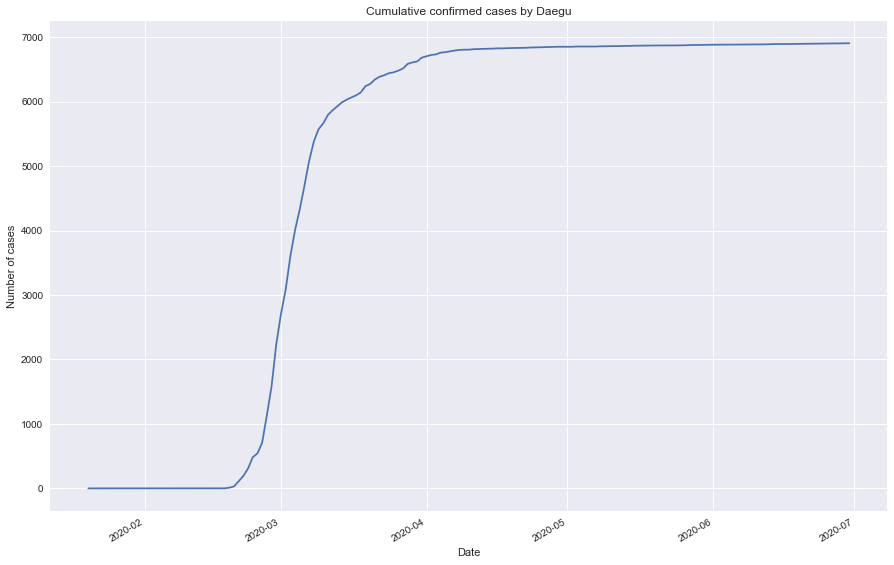

In [40]:
fig = plt.figure(figsize=(15,10))
plt.title('Cumulative confirmed cases by Daegu')
plt.plot('date', 'confirmed', data=region_csv[region_csv['province']=='Daegu'])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.gcf().autofmt_xdate()
plt.show()

In [41]:
print("Answers to Q16 : ", 3)

Answers to Q16 :  3


In [42]:
                                                #17

In [52]:
provinces_seoul_508 = region_csv[region_csv['released'] == 508]
provinces_seoul_508

,date,time,province,confirmed,released,deceased
1836,2020-05-07,0,Seoul,637,508,2


In [53]:
provinces_seoul_508_date = provinces_seoul_508['date']
provinces_seoul_508_date

1836   2020-05-07
Name: date, dtype: datetime64[ns]

In [54]:
print("Answer to Q17 : ", 7)

Answer to Q17 :  7


### Task 3: Gender

In [55]:
for path in eda_paths:
    print(path)

./corona_dataset\Case.csv
./corona_dataset\PatientInfo.csv
./corona_dataset\Policy.csv
./corona_dataset\Region.csv
./corona_dataset\SearchTrend.csv
./corona_dataset\SeoulFloating.csv
./corona_dataset\Time.csv
./corona_dataset\TimeAge.csv
./corona_dataset\TimeGender.csv
./corona_dataset\TimeProvince.csv
./corona_dataset\Weather.csv


In [56]:
gender_csv = pd.read_csv(eda_paths[8]) # read the data
gender_csv

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [57]:
                                                #18

In [58]:
end_of_june = gender_csv[gender_csv['date'] == '2020-06-30']
end_of_june

,date,time,sex,confirmed,deceased
240,2020-06-30,0,male,5495,151
241,2020-06-30,0,female,7305,131


In [59]:
sex_confirmed = end_of_june['confirmed'].sum()
sex_confirmed

12800

In [60]:
sex_confirmed_female = end_of_june['confirmed'].loc[end_of_june['sex'] == 'female']
sex_confirmed_female

241    7305
Name: confirmed, dtype: int64

In [61]:
answer_18 = round(100 * sex_confirmed_female / sex_confirmed, 2)
print("Answer to Q18 : ", float(answer_18))

Answer to Q18 :  57.07


In [62]:
                                                #19

In [63]:
sex_confirmed_male = end_of_june['confirmed'].loc[end_of_june['sex'] == 'male']
sex_confirmed_male

240    5495
Name: confirmed, dtype: int64

In [64]:
answer_19 = round(100 * sex_confirmed_male / sex_confirmed, 2)
print("Answer to Q19 : ", float(answer_19))

Answer to Q19 :  42.93


In [65]:
                                                #20

In [66]:
sex_deceased = end_of_june['deceased'].sum()
sex_deceased

282

In [67]:
sex_deceased_female = end_of_june['deceased'].loc[end_of_june['sex'] == 'female']
sex_deceased_female

241    131
Name: deceased, dtype: int64

In [68]:
answer_20 = round(100 * sex_deceased_female / sex_deceased,2)
print("Answer to Q20 : ", float(answer_20))

Answer to Q20 :  46.45


In [69]:
                                                #21

In [70]:
sex_deceased_male = end_of_june['deceased'].loc[end_of_june['sex'] == 'male']
sex_deceased_male

240    151
Name: deceased, dtype: int64

In [71]:
answer_21 = round(100 * sex_deceased_male / sex_deceased,2)
print("Answer to Q21 : ", float(answer_21))

Answer to Q21 :  53.55


### Task 4: Path

In [72]:
for path in eda_paths:
    print(path)

./corona_dataset\Case.csv
./corona_dataset\PatientInfo.csv
./corona_dataset\Policy.csv
./corona_dataset\Region.csv
./corona_dataset\SearchTrend.csv
./corona_dataset\SeoulFloating.csv
./corona_dataset\Time.csv
./corona_dataset\TimeAge.csv
./corona_dataset\TimeGender.csv
./corona_dataset\TimeProvince.csv
./corona_dataset\Weather.csv


In [73]:
path_csv = pd.read_csv(eda_paths[0]) # read the data
path_csv

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


In [74]:
                                                #22

In [75]:
path_lot = path_csv['infection_case'].nunique()
print("Answer to Q22 : ", path_lot)

Answer to Q22 :  81


In [76]:
                                                #23

In [77]:
path_total = path_csv['confirmed'].sum()
path_total

11395

In [78]:
path_god = path_csv[path_csv['infection_case'] == 'Shincheonji Church']
path_god_total = path_god['confirmed'].sum()
path_god_total

5213

In [79]:
answer_23 = 100 * path_god_total / path_total
print("Answer to Q23 : ", round(answer_23, 2))

Answer to Q23 :  45.75


In [80]:
                                                #24

In [81]:
path_from_oversea = path_csv[path_csv['infection_case'] == 'overseas inflow']
path_from_oversea

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
35,1000036,Seoul,-,False,overseas inflow,298,-,-
45,1100008,Busan,-,False,overseas inflow,36,-,-
55,1200008,Daegu,-,False,overseas inflow,41,-,-
60,1300003,Gwangju,-,False,overseas inflow,23,-,-
67,1400005,Incheon,-,False,overseas inflow,68,-,-
77,1500008,Daejeon,-,False,overseas inflow,15,-,-
81,1600002,Ulsan,-,False,overseas inflow,25,-,-
87,1700004,Sejong,-,False,overseas inflow,5,-,-
109,2000020,Gyeonggi-do,-,False,overseas inflow,305,-,-
117,3000006,Gangwon-do,-,False,overseas inflow,16,-,-


In [82]:
path_from_oversea_seoul = path_from_oversea[path_from_oversea['province']=='Seoul']
path_from_oversea_seoul

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
35,1000036,Seoul,-,False,overseas inflow,298,-,-


In [83]:
path_from_oversea_seoul_total = path_from_oversea_seoul['confirmed'].sum()
path_from_oversea_seoul_total

298

In [84]:
print("Answer to Q24 : ", round(100 * path_from_oversea_seoul_total / path_total, 2))

Answer to Q24 :  2.62


In [85]:
                                                #25

In [86]:
path_1 = path_csv['confirmed'].sum()
path_2 = path_csv[path_csv['group']==1]['confirmed'].sum()
print(path_1, path_2)
path_3 = 100 * path_2 / path_1
print('Answer to Q25:',round(path_3, 2))

11395 7851
Answer to Q25: 68.9


In [87]:
                                                #26

In [88]:
path_26 = path_csv[path_csv['group']==0]['confirmed'].sum()
path_26
print('Answer to Q26:', path_26)

Answer to Q26: 3544


### Task 5: Weather

In [89]:
# load/read the data
# drop missing values (Null/NaN)
# correct misspelled value under the provinces column
# create appropriate plots

In [90]:
for path in eda_paths:
    print(path)

./corona_dataset\Case.csv
./corona_dataset\PatientInfo.csv
./corona_dataset\Policy.csv
./corona_dataset\Region.csv
./corona_dataset\SearchTrend.csv
./corona_dataset\SeoulFloating.csv
./corona_dataset\Time.csv
./corona_dataset\TimeAge.csv
./corona_dataset\TimeGender.csv
./corona_dataset\TimeProvince.csv
./corona_dataset\Weather.csv


In [91]:
weather_csv = pd.read_csv(eda_paths[10]) # read the data
weather_csv

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [92]:
                                                #27

In [93]:
weather_nan_count = weather_csv.isnull().values.sum()
print("Answer to Q27 : ", weather_nan_count)

Answer to Q27 :  81


In [94]:
                                                #28

In [95]:
weather_csv = weather_csv.dropna()
weather_csv

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [96]:
print("Answer to Q28 : ", len(weather_csv))

Answer to Q28 :  26224


In [97]:
                                                #29

In [98]:
weather_wrong = weather_csv['province'].unique()
weather_wrong

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
       'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do',
       'Chunghceongbuk-do'], dtype=object)

In [99]:
weather_correct = weather_csv['province'].nunique()
weather_correct

17

In [100]:
print("Answer to Q29 : ", weather_correct-1)

Answer to Q29 :  16


In [101]:
                                                #30

In [102]:
weather_max_of_avg_temp = weather_csv['avg_temp'].max()
weather_max_of_avg_temp

33.9

In [103]:
print("Answer to Q30 : ", weather_max_of_avg_temp)

Answer to Q30 :  33.9


In [104]:
                                                #31

In [105]:
weather_min_of_rel_humid = weather_csv['avg_relative_humidity'].min()
weather_min_of_rel_humid

10.4

In [106]:
print("Answer to Q31 : ", weather_min_of_rel_humid)

Answer to Q31 :  10.4


### Task 6: Patient

In [107]:
# load/read the data
# create appropriate plots

In [108]:
for path in eda_paths:
    print(path)

./corona_dataset\Case.csv
./corona_dataset\PatientInfo.csv
./corona_dataset\Policy.csv
./corona_dataset\Region.csv
./corona_dataset\SearchTrend.csv
./corona_dataset\SeoulFloating.csv
./corona_dataset\Time.csv
./corona_dataset\TimeAge.csv
./corona_dataset\TimeGender.csv
./corona_dataset\TimeProvince.csv
./corona_dataset\Weather.csv


In [109]:
patient_csv = pd.read_csv(eda_paths[1]) # read the data
patient_csv

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [110]:
                                                #32

In [111]:
patient_badguy = patient_csv['contact_number'].dropna().max()
print("Answer to Q32 : ", patient_badguy)

Answer to Q32 :  95


In [112]:
                                                #33

In [113]:
patient_foreign = patient_csv[patient_csv['country'] != 'Korea']
patient_foreign = patient_foreign['country'].count()
print("Answer to Q33 : ", patient_foreign)

Answer to Q33 :  42


### Task 7: Search

In [114]:
# load/read the data
# create appropriate plots

In [115]:
for path in eda_paths:
    print(path)

./corona_dataset\Case.csv
./corona_dataset\PatientInfo.csv
./corona_dataset\Policy.csv
./corona_dataset\Region.csv
./corona_dataset\SearchTrend.csv
./corona_dataset\SeoulFloating.csv
./corona_dataset\Time.csv
./corona_dataset\TimeAge.csv
./corona_dataset\TimeGender.csv
./corona_dataset\TimeProvince.csv
./corona_dataset\Weather.csv


In [116]:
search_csv = pd.read_csv(eda_paths[4]) # read the data
search_csv

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


In [117]:
                                                #34

In [118]:
search_lot = search_csv.shape[1]-1
print("Answer to Q34 : ", search_lot)

Answer to Q34 :  4


In [119]:
                                                #35

In [120]:
search_days = search_csv['date'].nunique()
print("Answer to Q35 : ", search_days)

Answer to Q35 :  1642


In [121]:
                                                #36

In [122]:
df1 = search_csv.drop(columns=['cold','flu','pneumonia'])
df1

,date,coronavirus
0,2016-01-01,0.00736
1,2016-01-02,0.00890
2,2016-01-03,0.00845
3,2016-01-04,0.01145
4,2016-01-05,0.01381
...,...,...
1637,2020-06-25,2.16993
1638,2020-06-26,2.15139
1639,2020-06-27,1.96848
1640,2020-06-28,2.19720


In [123]:
search_csv['date'] = pd.to_datetime(search_csv['date'])

In [124]:
time_csv = pd.read_csv(eda_paths[6])
time_csv['date'] = pd.to_datetime(time_csv['date'])

In [125]:
date1 = time_csv[time_csv['confirmed']==1]["date"]
print(date1)
date1[0]

0   2020-01-20
1   2020-01-21
2   2020-01-22
3   2020-01-23
Name: date, dtype: datetime64[ns]


Timestamp('2020-01-20 00:00:00')

In [126]:
df3 = search_csv[search_csv['coronavirus']==100]["date"]
print(df3)

1483   2020-01-23
Name: date, dtype: datetime64[ns]


In [127]:
df4 = df3-date1[0]
print(df4)

1483   3 days
Name: date, dtype: timedelta64[ns]


In [128]:
print("Answers to Q36 : ", 3)

Answers to Q36 :  3


### Task 8: Test

In [129]:
# load/read the data
# create appropriate plots

In [130]:
for path in eda_paths:
    print(path)

./corona_dataset\Case.csv
./corona_dataset\PatientInfo.csv
./corona_dataset\Policy.csv
./corona_dataset\Region.csv
./corona_dataset\SearchTrend.csv
./corona_dataset\SeoulFloating.csv
./corona_dataset\Time.csv
./corona_dataset\TimeAge.csv
./corona_dataset\TimeGender.csv
./corona_dataset\TimeProvince.csv
./corona_dataset\Weather.csv


In [131]:
test_csv = pd.read_csv(eda_paths[6]) # read the data
test_csv

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [132]:
                                                #37

In [133]:
test_lot = test_csv['test'].max()
print("Answer to Q37 : ", test_lot)

Answer to Q37 :  1273766


In [134]:
                                                #38

In [135]:
test_negative = test_csv['negative'].max()
test_negative_ratio = 100 * test_negative / test_lot
print("Answer to Q38 : ", round(test_negative_ratio, 2))

Answer to Q38 :  97.36


In [136]:
                                                #39

In [137]:
test_deceased = test_csv['deceased'].max()
print("Answer to Q39 : ", test_deceased)

Answer to Q39 :  282


In [138]:
                                                #40

In [139]:
test_released = test_csv['released'].max()
print("Answer to Q40 : ", test_released)

Answer to Q40 :  11537


### Task 9: Policy

In [140]:
# load/read the data
# create appropriate plots

### Conclusion

